In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

df["Age"].fillna(df["Age"].median())
df["Embarked"].fillna(df["Embarked"].mode()[0])
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [6]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [8]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[92 18]
 [23 46]]


In [13]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

Accuracy : 0.770949720670391
Precision: 0.71875
Recall   : 0.6666666666666666
F1-Score : 0.6917293233082706


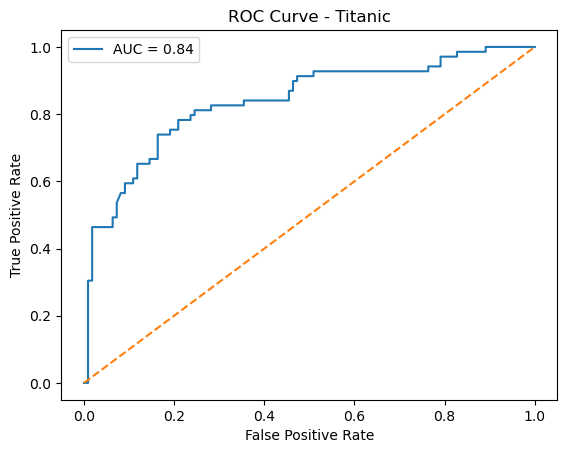

In [14]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Titanic")
plt.legend()
plt.show()

In [15]:
cv_scores = cross_val_score(
    LogisticRegression(max_iter=1000),
    X_train_scaled,
    y_train,
    cv=5,
    scoring="f1"
)

print("CV F1 Scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())

CV F1 Scores: [0.7079646  0.63157895 0.74782609 0.76190476 0.74545455]
Mean CV F1: 0.7189457886908324


In [16]:
C_values = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for c in C_values:
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    
    train_scores.append(lr.score(X_train_scaled, y_train))
    test_scores.append(lr.score(X_test_scaled, y_test))


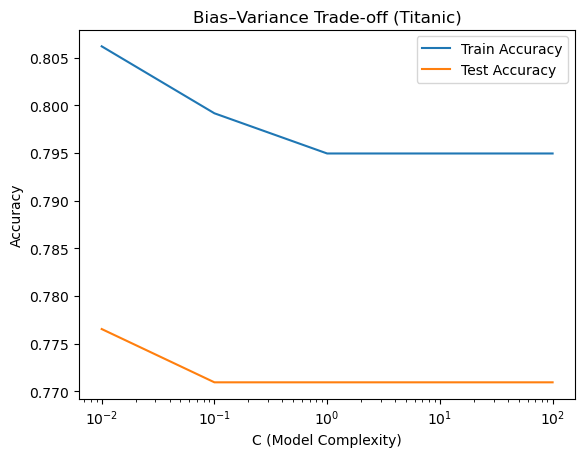

In [17]:
plt.plot(C_values, train_scores, label="Train Accuracy")
plt.plot(C_values, test_scores, label="Test Accuracy")
plt.xscale("log")
plt.xlabel("C (Model Complexity)")
plt.ylabel("Accuracy")
plt.title("Bias–Variance Trade-off (Titanic)")
plt.legend()
plt.show()
